In [1]:
## install necessary packages
install.packages (c("class", "caret", "tidyverse"))
library(class)
library(caret)
library(tidyverse)

Installing packages into ‘/Users/pragya/Library/R/3.6/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/1g/yrxz3r8n5_7bjtfdrnhshmfh0000gp/T//RtmpZhk4di/downloaded_packages


Warning message:
“package ‘class’ was built under R version 3.6.2”
Warning message:
“package ‘caret’ was built under R version 3.6.2”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Loading required package: lattice

Warning message:
“package ‘tidyverse’ was built under R version 3.6.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

Warning message:
“package ‘tibble’ was built under R version 3.6.2”
Warning message:
“package ‘tidyr’ was built under R version 3.6.2”
Warning message:
“package ‘readr’ was built under R version 3.6.2”
Warning message:
“package ‘purrr’ was built under R version 3.6.2”
Warning message:
“package ‘dplyr’ was built under R version 3.6.2”
Warning message:
“package ‘forcats’ was built under R version 3.6.2”
── Conflicts ──────────────────────────

In [2]:
## importing data 
full_data<-read_csv("healthcare-dataset-stroke-data/train_2v.csv")
head(full_data)
summary(full_data)


── Column specification ────────────────────────────────────────────────────────
cols(
  id = col_double(),
  gender = col_character(),
  age = col_double(),
  hypertension = col_double(),
  heart_disease = col_double(),
  ever_married = col_character(),
  work_type = col_character(),
  Residence_type = col_character(),
  avg_glucose_level = col_double(),
  bmi = col_double(),
  smoking_status = col_character(),
  stroke = col_double()
)




id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
30669,Male,3,0,0,No,children,Rural,95.12,18.0,NA,0
30468,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
16523,Female,8,0,0,No,Private,Urban,110.89,17.6,NA,0
56543,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
46136,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,NA,0
32257,Female,47,0,0,Yes,Private,Urban,210.95,50.1,NA,0


       id           gender               age         hypertension    
 Min.   :    1   Length:43400       Min.   : 0.08   Min.   :0.00000  
 1st Qu.:18038   Class :character   1st Qu.:24.00   1st Qu.:0.00000  
 Median :36352   Mode  :character   Median :44.00   Median :0.00000  
 Mean   :36326                      Mean   :42.22   Mean   :0.09357  
 3rd Qu.:54514                      3rd Qu.:60.00   3rd Qu.:0.00000  
 Max.   :72943                      Max.   :82.00   Max.   :1.00000  
                                                                     
 heart_disease     ever_married        work_type         Residence_type    
 Min.   :0.00000   Length:43400       Length:43400       Length:43400      
 1st Qu.:0.00000   Class :character   Class :character   Class :character  
 Median :0.00000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.04751                                                           
 3rd Qu.:0.00000                                            

In [3]:
## class of the categorical variables are incorrect. Change them from 'character' to 'factor'
full_data$gender<-factor(full_data$gender)
full_data$ever_married<-factor(full_data$ever_married)
full_data$work_type<-factor(full_data$work_type)
full_data$smoking_status<-factor(full_data$smoking_status)
full_data$Residence_type<-factor(full_data$Residence_type)
summary(full_data) ## missing values in bmi and smoking_status

       id           gender           age         hypertension    
 Min.   :    1   Female:25665   Min.   : 0.08   Min.   :0.00000  
 1st Qu.:18038   Male  :17724   1st Qu.:24.00   1st Qu.:0.00000  
 Median :36352   Other :   11   Median :44.00   Median :0.00000  
 Mean   :36326                  Mean   :42.22   Mean   :0.09357  
 3rd Qu.:54514                  3rd Qu.:60.00   3rd Qu.:0.00000  
 Max.   :72943                  Max.   :82.00   Max.   :1.00000  
                                                                 
 heart_disease     ever_married         work_type     Residence_type
 Min.   :0.00000   No :15462    Govt_job     : 5440   Rural:21644   
 1st Qu.:0.00000   Yes:27938    Never_worked :  177   Urban:21756   
 Median :0.00000                Private      :24834                 
 Mean   :0.04751                Self-employed: 6793                 
 3rd Qu.:0.00000                children     : 6156                 
 Max.   :1.00000                                          

In [4]:
length(unique(full_data$id))
select(full_data, -id)->full_data
head(full_data)

[1] 43400

gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
Male,3,0,0,No,children,Rural,95.12,18.0,NA,0
Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
Female,8,0,0,No,Private,Urban,110.89,17.6,NA,0
Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
Male,14,0,0,No,Never_worked,Rural,161.28,19.1,NA,0
Female,47,0,0,Yes,Private,Urban,210.95,50.1,NA,0


In [5]:
is.data.frame(full_data)

[1] TRUE

 - Imputing fro misssing values for bmi
 - checking for correlation between bmi and related variables

age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0.3588972,0.1612252,0.05767724,0.1912952,1,0.02028479


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 1462 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1462 rows containing missing values (geom_point).”


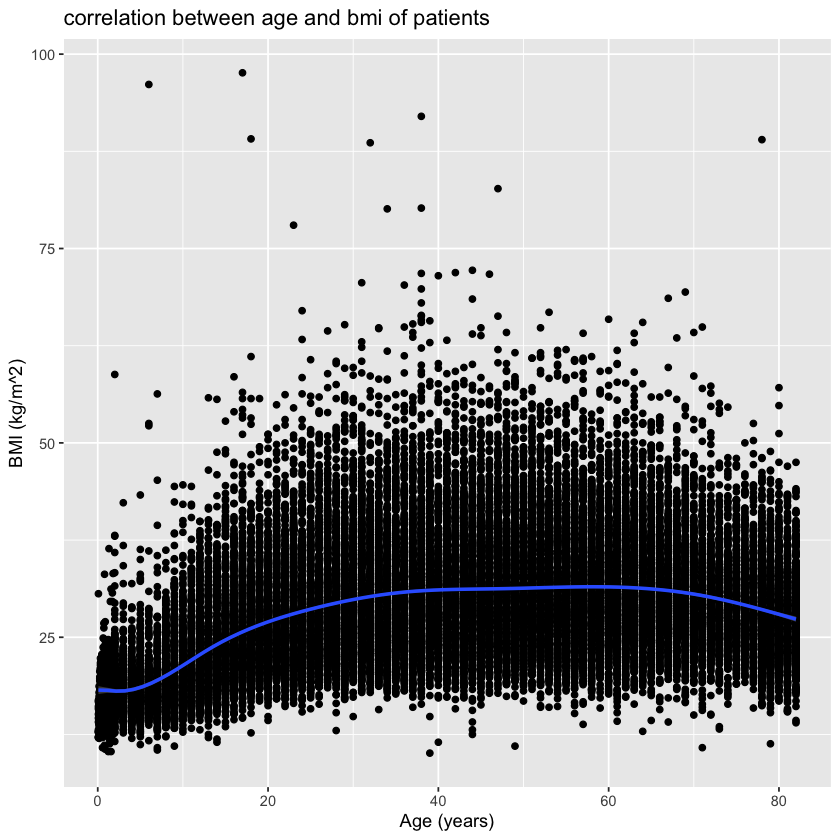

In [6]:
cor(full_data$bmi,full_data[sapply(full_data, is.numeric)],use="complete.obs")
ggplot(data=full_data, mapping=aes(age,bmi))+geom_point()+labs(title="correlation between age and bmi of patients", x="Age (years)", y="BMI (kg/m^2)")+geom_smooth()

 - There is a positive correlation between age and bmi, which is relatively higher compared to other variables. 
 - This correlation initially increases with age and then decreases. Hence, to impute the missing values of bmi we fit a second order polynomial.

In [7]:
impute_bmi_model<-lm(full_data$bmi ~ poly(full_data$age,2))
summary(impute_bmi_model)


Call:
lm(formula = full_data$bmi ~ poly(full_data$age, 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-20.902  -4.454  -1.059   3.210  75.835 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               28.63858    0.03277  873.95   <2e-16 ***
poly(full_data$age, 2)1  574.64471    6.83710   84.05   <2e-16 ***
poly(full_data$age, 2)2 -573.83229    6.82939  -84.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.71 on 41935 degrees of freedom
  (1462 observations deleted due to missingness)
Multiple R-squared:  0.2543,	Adjusted R-squared:  0.2543 
F-statistic:  7152 on 2 and 41935 DF,  p-value: < 2.2e-16


In [8]:
#replacing the values using the above model
full_data2=full_data %>% 
    mutate(bmi=ifelse(is.na(bmi),predict(impute_bmi_model),bmi))

In [9]:
summary(full_data2)

    gender           age         hypertension     heart_disease    
 Female:25665   Min.   : 0.08   Min.   :0.00000   Min.   :0.00000  
 Male  :17724   1st Qu.:24.00   1st Qu.:0.00000   1st Qu.:0.00000  
 Other :   11   Median :44.00   Median :0.00000   Median :0.00000  
                Mean   :42.22   Mean   :0.09357   Mean   :0.04751  
                3rd Qu.:60.00   3rd Qu.:0.00000   3rd Qu.:0.00000  
                Max.   :82.00   Max.   :1.00000   Max.   :1.00000  
 ever_married         work_type     Residence_type avg_glucose_level
 No :15462    Govt_job     : 5440   Rural:21644    Min.   : 55.00   
 Yes:27938    Never_worked :  177   Urban:21756    1st Qu.: 77.54   
              Private      :24834                  Median : 91.58   
              Self-employed: 6793                  Mean   :104.48   
              children     : 6156                  3rd Qu.:112.07   
                                                   Max.   :291.05   
      bmi               smoking_status   

 - mean and median bmi does not change much after imputations
 - check correlation between age and bmi

In [10]:
cor(full_data2$bmi,full_data[sapply(full_data, is.numeric)],use="complete.obs")# correlation after bmi imputations
cor(full_data$bmi,full_data[sapply(full_data, is.numeric)],use="complete.obs") #correlation after bmi impuations

age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0.3588972,0.1612252,0.05767724,0.1912952,1,0.02028479


age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0.3588972,0.1612252,0.05767724,0.1912952,1,0.02028479


 - Imputations seems to work as the center values and correlations did not change. 

##### Imputing missing values of smoking_status. There are many missing values here. So, lets check if there is a trend in missing values.

formerly smoked    never smoked          smokes            NA's 
           7493           16053            6562           13292

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



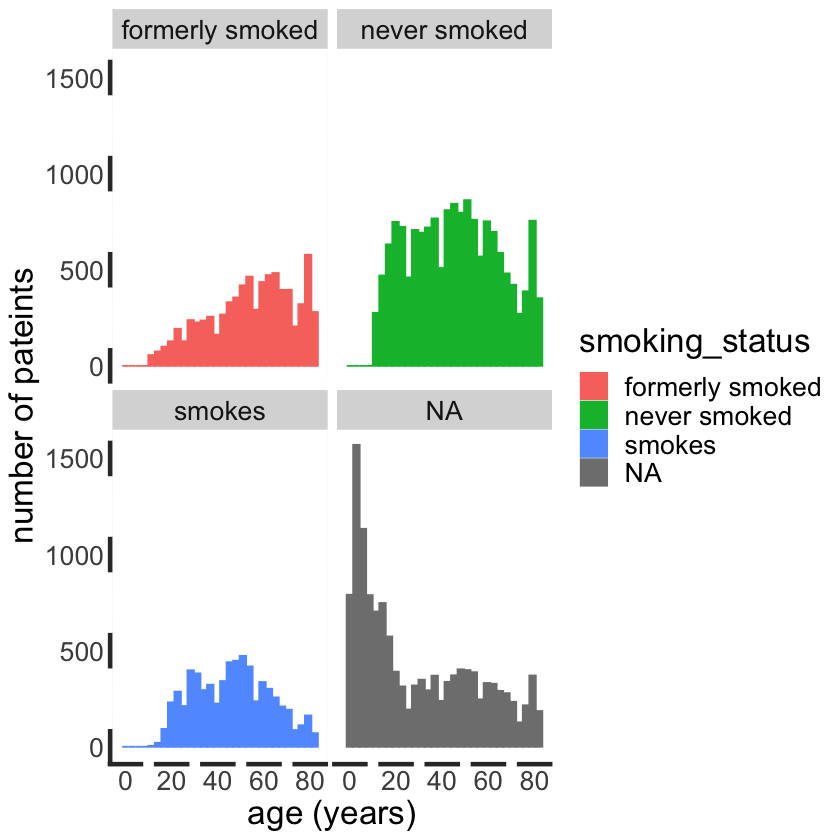

In [11]:
summary(full_data2$smoking_status)
ggplot(data=full_data2, mapping=aes(x=age, color=smoking_status, fill=smoking_status))+
    geom_histogram()+
    facet_wrap(~smoking_status)+
    theme(text = element_text(size = 20), element_line(size = 10))+
    labs(x= "age (years)", y="number of pateints")

Missing values are higher for children less than 10 years of age, though there some child smokers. It is not appropiate to impute 'non-smoker' status for them, since children in the UK start smoking at an early age [AHSORG2016,NHS2011]. Data also shows eleven years old who were former smokers. Since a large number of values are missing and smoking is a known risk factor for stroke, imputing a fixed value could decrease the prediction accuracy of the model. 

Therefore the missing values in `smoking_status` can be handled in the following manner: 
   1. drop the observations with NA (Used in this study)
   2. treat NA as a 4th level

In [12]:
train1<-na.omit(full_data2) ## dataset with NA removed from smoking_status
summary(train1)
train2<-full_data2
levels(train2$smoking_status)
levels(train2$smoking_status)<-c(levels(train2$smoking_status),"not available") 
train2$smoking_status[is.na(train2$smoking_status)] <- "not available" 
levels(train2$smoking_status)
summary(train2)
train1_copy<-train1 ## making copies of the training dataset
train2_copy<-train2

    gender           age         hypertension    heart_disease     ever_married
 Female:18366   Min.   :10.00   Min.   :0.0000   Min.   :0.00000   No : 7557   
 Male  :11733   1st Qu.:33.00   1st Qu.:0.0000   1st Qu.:0.00000   Yes:22551   
 Other :    9   Median :48.00   Median :0.0000   Median :0.00000               
                Mean   :47.94   Mean   :0.1172   Mean   :0.05573               
                3rd Qu.:62.00   3rd Qu.:0.0000   3rd Qu.:0.00000               
                Max.   :82.00   Max.   :1.0000   Max.   :1.00000               
         work_type     Residence_type avg_glucose_level      bmi       
 Govt_job     : 4346   Rural:14982    Min.   : 55.01    Min.   :10.10  
 Never_worked :  101   Urban:15126    1st Qu.: 77.84    1st Qu.:25.00  
 Private      :19585                  Median : 92.39    Median :29.00  
 Self-employed: 5445                  Mean   :107.19    Mean   :29.99  
 children     :  631                  3rd Qu.:114.49    3rd Qu.:33.60  
        

[1] "formerly smoked" "never smoked"    "smokes"

[1] "formerly smoked" "never smoked"    "smokes"          "not available"

    gender           age         hypertension     heart_disease    
 Female:25665   Min.   : 0.08   Min.   :0.00000   Min.   :0.00000  
 Male  :17724   1st Qu.:24.00   1st Qu.:0.00000   1st Qu.:0.00000  
 Other :   11   Median :44.00   Median :0.00000   Median :0.00000  
                Mean   :42.22   Mean   :0.09357   Mean   :0.04751  
                3rd Qu.:60.00   3rd Qu.:0.00000   3rd Qu.:0.00000  
                Max.   :82.00   Max.   :1.00000   Max.   :1.00000  
 ever_married         work_type     Residence_type avg_glucose_level
 No :15462    Govt_job     : 5440   Rural:21644    Min.   : 55.00   
 Yes:27938    Never_worked :  177   Urban:21756    1st Qu.: 77.54   
              Private      :24834                  Median : 91.58   
              Self-employed: 6793                  Mean   :104.48   
              children     : 6156                  3rd Qu.:112.07   
                                                   Max.   :291.05   
      bmi               smoking_status   

In [13]:
#normalizing the numerical variables for train1 dataset (NA values are removed from the smoking_status)
pp<-preProcess(train1, method=c("range"))
train1_copy<-predict(pp, train1_copy)
head(train1_copy)
## to build a logitic regression model dependent variable 'stroke' should be a factor variable
train1_copy$stroke<-as.factor(train1_copy$stroke)

gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
Male,0.6666667,1,0,Yes,Private,Urban,0.13959498,0.35531136,never smoked,0
Female,0.8333333,0,0,Yes,Private,Rural,0.05943908,0.31501832,formerly smoked,0
Female,0.5833333,0,0,Yes,Private,Urban,0.09566175,0.09279609,formerly smoked,0
Female,0.9027778,0,1,Yes,Self-employed,Rural,0.79867819,0.20634921,never smoked,0
Female,0.3055556,0,0,Yes,Private,Rural,0.09600068,0.27106227,smokes,0
Female,0.8888889,1,0,Yes,Self-employed,Urban,0.63900186,0.54334554,never smoked,0


In [14]:
train1_copy$stroke<-as.factor(train1_copy$stroke)
summary (train1_copy)

    gender           age          hypertension    heart_disease    
 Female:18366   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 Male  :11733   1st Qu.:0.3194   1st Qu.:0.0000   1st Qu.:0.00000  
 Other :    9   Median :0.5278   Median :0.0000   Median :0.00000  
                Mean   :0.5269   Mean   :0.1172   Mean   :0.05573  
                3rd Qu.:0.7222   3rd Qu.:0.0000   3rd Qu.:0.00000  
                Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
 ever_married         work_type     Residence_type avg_glucose_level
 No : 7557    Govt_job     : 4346   Rural:14982    Min.   :0.00000  
 Yes:22551    Never_worked :  101   Urban:15126    1st Qu.:0.09671  
              Private      :19585                  Median :0.15838  
              Self-employed: 5445                  Mean   :0.22106  
              children     :  631                  3rd Qu.:0.25200  
                                                   Max.   :1.00000  
      bmi                 smoking_status 

In [15]:
## generating weights
wt_0 = length(train1_copy$stroke)/(2*(sum(train1_copy$stroke=='0')))
wt_1 = length(train1_copy$stroke)/(2*(sum(train1_copy$stroke=='1')))
wt_0
wt_1 
wt = ifelse (train1_copy$stroke=='0', wt_0, wt_1)


[1] 0.5108246

[1] 23.59561

In [16]:
train1_copy$wt<-wt
summary(train1_copy)

    gender           age          hypertension    heart_disease    
 Female:18366   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 Male  :11733   1st Qu.:0.3194   1st Qu.:0.0000   1st Qu.:0.00000  
 Other :    9   Median :0.5278   Median :0.0000   Median :0.00000  
                Mean   :0.5269   Mean   :0.1172   Mean   :0.05573  
                3rd Qu.:0.7222   3rd Qu.:0.0000   3rd Qu.:0.00000  
                Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
 ever_married         work_type     Residence_type avg_glucose_level
 No : 7557    Govt_job     : 4346   Rural:14982    Min.   :0.00000  
 Yes:22551    Never_worked :  101   Urban:15126    1st Qu.:0.09671  
              Private      :19585                  Median :0.15838  
              Self-employed: 5445                  Mean   :0.22106  
              children     :  631                  3rd Qu.:0.25200  
                                                   Max.   :1.00000  
      bmi                 smoking_status 

In [17]:
model1<- glm(stroke ~ gender + age + hypertension + heart_disease + ever_married+work_type+
                   Residence_type + avg_glucose_level + bmi + smoking_status, data=train1_copy, weights = wt, family=binomial("logit"))
model1

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:  glm(formula = stroke ~ gender + age + hypertension + heart_disease + 
    ever_married + work_type + Residence_type + avg_glucose_level + 
    bmi + smoking_status, family = binomial("logit"), data = train1_copy, 
    weights = wt)

Coefficients:
               (Intercept)                  genderMale  
                  -4.15433                     0.03598  
               genderOther                         age  
                 -13.10747                     5.35262  
              hypertension               heart_disease  
                   0.43944                     0.63959  
           ever_marriedYes       work_typeNever_worked  
                  -0.01142                   -12.45554  
          work_typePrivate      work_typeSelf-employed  
                   0.14911                     0.17945  
         work_typechildren         Residence_typeUrban  
                 -11.41110                     0.10672  
         avg_glucose_level                         bmi  
    

In [18]:
summary(model1)


Call:
glm(formula = stroke ~ gender + age + hypertension + heart_disease + 
    ever_married + work_type + Residence_type + avg_glucose_level + 
    bmi + smoking_status, family = binomial("logit"), data = train1_copy, 
    weights = wt)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8283  -0.8716  -0.5430  -0.3057  12.6356  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -4.15433    0.09537 -43.561  < 2e-16 ***
genderMale                   0.03598    0.02949   1.220 0.222389    
genderOther                -13.10747  523.69137  -0.025 0.980032    
age                          5.35262    0.07997  66.930  < 2e-16 ***
hypertension                 0.43944    0.03629  12.108  < 2e-16 ***
heart_disease                0.63959    0.04613  13.865  < 2e-16 ***
ever_marriedYes             -0.01142    0.04688  -0.244 0.807471    
work_typeNever_worked      -12.45554  169.70684  -0.073 0.941492    
work_typePr

### Significant features for predicting a stroke are:
- Age
- Hypertension
- Heart Disease
- Work Type 
- Residence Type
- Average Glucose Level
- Smoking Status